In [31]:
import tensorflow as tf
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, MaxPooling2D, Dropout, Conv2D, Activation, GlobalAveragePooling2D
from tensorflow.image import rgb_to_grayscale
import numpy as np
import matplotlib.pyplot as plt

In [21]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

In [51]:
train_set = datagen.flow_from_directory(
    'smile_data', target_size=(64,64), class_mode='binary', subset='training', batch_size=32, color_mode='grayscale'
)
valid_set = datagen.flow_from_directory(
    'smile_data', target_size=(64,64), class_mode='binary', subset='validation', batch_size=32, color_mode='grayscale'
)

Found 11849 images belonging to 2 classes.
Found 1316 images belonging to 2 classes.


In [55]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(64,64,1), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1152)            

In [56]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
history = model.fit(train_set, epochs=10, validation_data=valid_set)

Epoch 1/10
371/371 [==============================] - 26s 71ms/step - loss: 0.4735 - accuracy: 0.7828 - val_loss: 0.2901 - val_accuracy: 0.8792
Epoch 2/10
371/371 [==============================] - 30s 81ms/step - loss: 0.3041 - accuracy: 0.8824 - val_loss: 0.2665 - val_accuracy: 0.8929
Epoch 3/10
371/371 [==============================] - 30s 81ms/step - loss: 0.2669 - accuracy: 0.8963 - val_loss: 0.2235 - val_accuracy: 0.9179
Epoch 4/10
371/371 [==============================] - 33s 90ms/step - loss: 0.2460 - accuracy: 0.9044 - val_loss: 0.2317 - val_accuracy: 0.9157
Epoch 5/10
371/371 [==============================] - 35s 96ms/step - loss: 0.2351 - accuracy: 0.9113 - val_loss: 0.1985 - val_accuracy: 0.9225
Epoch 6/10
371/371 [==============================] - 37s 99ms/step - loss: 0.2202 - accuracy: 0.9175 - val_loss: 0.2009 - val_accuracy: 0.9225
Epoch 7/10
371/371 [==============================] - 34s 91ms/step - loss: 0.2065 - accuracy: 0.9198 - val_loss: 0.1935 - val_accuracy:

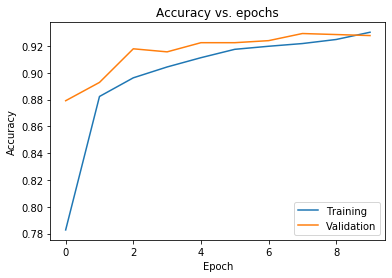

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [61]:
model.save('CustomSmileDetector.h5')